### Predicting the Future World Population

In this project, we are looking to predict the future population of the world using the data from the past (1960 to 2018). This is achieved using the magic of machine learning and more specific, regression.

The dataset for the total population  was taken from World Bank [World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL) and will be in a [comma separated format (csv)](https://en.wikipedia.org/wiki/Comma-separated_values) comma separated format (csv). The project will be coded up in Python so knowledge of the pandas and scikit-learn packages will be required.

Overall, our goal is to create a csv file of their future population up to 10 years away from now, into the file ‘future_world_population.csv’.


#### Resource

To begin, download the zip file below and extract out the csv file with the largest size, the ‘API_SP.POP.TOTL_DS2_en_csv_v2_103676.csv’ file. After putting the file in your directory it is better to rename it to something like ‘world_population.csv’ for convenience.

- World Bank Total Population (csv) (1960 – 2018) ([Download Link](https://data.worldbank.org/indicator/SP.POP.TOTL))





### Importing Packages

We import the packages needed for the analysis and that is at the minimum the pandas and the scikit-learn. Matplotlib is used for all the data visualizations to draw questions about the data and to format the data if necessary while numpy is used in order to convert the data to numpy arrays and/or be reshaped into different dimensions.

In [141]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#### Loading the Data

When the csv file is opened using Microsoft Excel, you will notice the  first four rows is not apart of the data. 

![csv](https://user-images.githubusercontent.com/18138100/63543591-0f1f2900-c51b-11e9-82d7-dd2f677d2fa5.PNG)

Hence, when importing the csv file to pandas we can skip the first four rows.

In [142]:
pop= 'API_SP.POP.TOTL_DS2_en_csv_v2_103676.csv'
df = pd.read_csv(pop, skiprows=4)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN


### Data Cleaning

We will clean the data in order to reduce the chance of errors. Here, we check which columns are useful and which are not.

In [143]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')


We will remove the features that do not help with the analysis and these are the `Country Code`, `Indicator Name`,`Indicator Code` and `Unnamed: 63`

In [144]:
columns_to_drop=['Country Code', 'Indicator Name','Indicator Code', 'Unnamed: 63']
df.drop(columns=columns_to_drop, inplace=True )

The following columns remains in the dataframe:

In [145]:
print(df.columns)

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


### Remaining Columns

We will change the  the first column named `Country Name` to `Country`.

In [146]:
df.rename(columns={'Country Name': 'Country'}, inplace=True)

In [147]:
print(df.columns)

Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


### Checking and Removing NaN Rows

Checking the numbers of NaN values in each columns

In [148]:
print(df.isnull().sum())

Country    0
1960       4
1961       4
1962       4
1963       4
1964       4
1965       4
1966       4
1967       4
1968       4
1969       4
1970       4
1971       4
1972       4
1973       4
1974       4
1975       4
1976       4
1977       4
1978       4
1979       4
1980       4
1981       4
1982       4
1983       4
1984       4
1985       4
1986       4
1987       4
1988       4
1989       4
1990       2
1991       2
1992       3
1993       3
1994       3
1995       2
1996       2
1997       2
1998       1
1999       1
2000       1
2001       1
2002       1
2003       1
2004       1
2005       1
2006       1
2007       1
2008       1
2009       1
2010       1
2011       1
2012       2
2013       2
2014       2
2015       2
2016       2
2017       2
2018       2
dtype: int64


In [149]:
print(df[df.isnull().T.any().T])

                       Country       1960       1961       1962       1963  \
67                     Eritrea  1007590.0  1033328.0  1060486.0  1088854.0   
108             Not classified        NaN        NaN        NaN        NaN   
125                     Kuwait   269029.0   300576.0   337348.0   378746.0   
194         West Bank and Gaza        NaN        NaN        NaN        NaN   
212                     Serbia        NaN        NaN        NaN        NaN   
223  Sint Maarten (Dutch part)        NaN        NaN        NaN        NaN   

          1964       1965       1966       1967       1968  ...       2009  \
67   1118159.0  1148189.0  1178875.0  1210302.0  1242635.0  ...  3119920.0   
108        NaN        NaN        NaN        NaN        NaN  ...        NaN   
125   423898.0   472037.0   523166.0   577164.0   632899.0  ...  2821045.0   
194        NaN        NaN        NaN        NaN        NaN  ...  3689099.0   
212        NaN        NaN        NaN        NaN        NaN  ...

We will remove the rows with NaN values before the machine learning state.

In [150]:
df.dropna(inplace=True)

We will check to see that all the NaN values are removed.

In [151]:
print(df.isnull().sum())

Country    0
1960       0
1961       0
1962       0
1963       0
1964       0
1965       0
1966       0
1967       0
1968       0
1969       0
1970       0
1971       0
1972       0
1973       0
1974       0
1975       0
1976       0
1977       0
1978       0
1979       0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
dtype: int64


### Data Visualizations

To get an idea about the data we are working with we can visualize the data. Let's get  the  population of Nigeria throughout the years.

First, we fetch the tuple with the data for the population of Nigeria and plot a scatter plot.

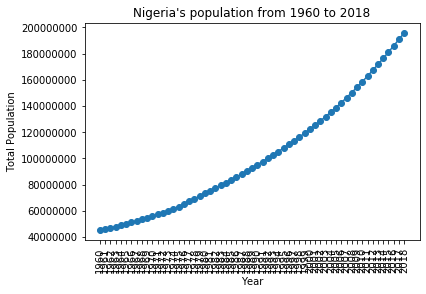

In [152]:

record = df[df['Country'] == 'Nigeria'] # get the tuple with the Nigeria's population data
years = record.columns.tolist()[1:] # get the years
population = record.values.tolist()[0][1:] # get the population with respect to the year
plt.scatter(years, population)  # plot scatter plot
plt.plot(years, population) # line to connect the points)
plt.xticks(rotation='vertical') # rotate x axis labels text to vertical inorder for it to show up and not cluster together
plt.title('Nigeria\'s population from 1960 to 2018') # set graph title
plt.xlabel('Year') # set y axis label
plt.ylabel('Total Population') # set y axis label

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f')) # turn of scientific notations
plt.show() # display graph


Here, we can see that since 1960's, Nigeria's population has been increasing  rapidly.




### Predicting the Future World Population

We will predict the population of every country for up to 10 years into the future. Since, we want to predict the future populations for each country we must make a list to iterate through each country. We will create a temporary dataframe to store the new future population data.

In [153]:
countries= df['Country'].tolist()
temp_df= pd.DataFrame()

for country in countries:
        # prepare data for the model
        record = df[df['Country'] == country].drop(['Country'], axis=1)
        record = record.T
        record.reset_index(inplace=True)
        record.columns = ['Year', 'Population']
        X = record['Year']
        Y = record['Population']

This will allow us to train the model for each country's population data:

In [154]:
regressor = LinearRegression()
regressor.fit(np.array(X).reshape(-1,1), Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
 # predict future population with respective year and add back to current record
for year in range(2019,2030):
        future_population = round(regressor.predict(np.array([year]).reshape(-1,1))[0])
        row = pd.DataFrame([[year,future_population]], columns=['Year','Population'])
        record = record.append(row, ignore_index=True)


In [156]:
# change narrow dataframe back to a wide one
record = record.T
new_header = record.iloc[0]
record = record[1:]
record.columns = new_header
record.columns.name = None
record.index = [country]
temp_df = pd.concat([temp_df, record])

Once the for loop completes we can export the new main dataframe into a csv file as we planned earlier.

In [164]:
# setting new dataframe instead of the original
df = temp_df
df.to_csv('Future_World_Population.csv')
